In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.utils import shuffle

In [2]:
# Fetching data
data = pd.read_csv('examination.csv')
mean = data.mean()
stddev = data.std()
# data = shuffle(data)
data.head()
# print(data)

,exam1,exam2,accept
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
# Separate out the Feature and Target matrices
data=np.asarray(data)
np.random.shuffle(data)
Y=data[:,-1:]
X=data[:,:-1]

# Nature of Data

# fig, ax = plt.subplots() 
# for i in range(len(X)):
#     if Y[i] == 1:
#         ax.plot(X[i][0], X[i][1], marker='o',color='b')
#     else:
#         ax.plot(X[i][0], X[i][1], marker='o',color='r')

one = np.ones((len(X),1))
X = np.concatenate((one,X),axis=1)
split_ratio = 0.7
split = int(split_ratio * X.shape[0])

X_train = X[:split+1, :]
Y_train = Y[:split+1, :]

X_test = X[split+1:,:]
Y_test = Y[split+1:,:]

# Extra features can be added for more accuracy

# X_train = np.concatenate((X_train,X_train[:,1:]**2), axis=1)
# X_test = np.concatenate((X_test,X_test[:,1:]**2), axis=1)


print(X_test.shape, X_train.shape)

(29, 3) (71, 3)


In [4]:
def computeError(predicted, actual):
    error = 0
    for i in range(len(predicted)):
        if(actual[i] != predicted[i]):
            error+=1
    error /= len(actual)
    return error*100

def getHessian(X, gx):
    identity = np.identity(gx.shape[0])
    identity = (gx*(1-gx))*identity
    return X.T@identity@X


def getJacobian(X,gx,y):
    return X.T@(gx - y)
    
def getG(thetax):
#     print("hi",thetax)
    return (1 / (1 + np.exp(-1 * thetax)))

In [5]:
# Newton's Method using deltalearning
def NewtonMethod(X,y,theta,iters):
    cost = []
    for i in range(iters):
        gx = getG(X @ theta)
        iden = np.identity(gx.shape[0])
        iden = (gx*(1-gx))*iden
#         print(iden)
        theta = theta - (1 / len(X))* np.linalg.inv(getHessian(X,gx))@(getJacobian(X,gx,y))
    return theta,cost


In [6]:
theta = np.zeros([X_train.shape[1],1])
iters = 20
# print(computeCost(X_train, Y_train, theta).shape)
g,cost = NewtonMethod(X_train,Y_train,theta,iters)
# print(g)
Y_pred = getG(X_test.dot(g))

for i in range(len(Y_pred)):
    if(Y_pred[i] >= 0.5):
        Y_pred[i] = 1
    else:
        Y_pred[i] = 0
# print(Y_pred,Y_test)
error = computeError(Y_pred,Y_test)
print("Accuracy : ", 100 - error)
print("Error : ", error)

Accuracy :  86.20689655172414
Error :  13.793103448275861


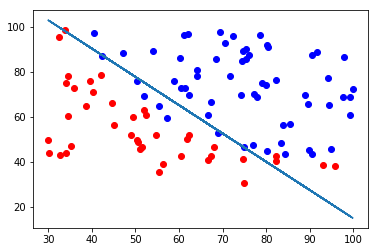

In [7]:
fig1,ax1 = plt.subplots()
X_tmp = X[:,1:]
Y_tmp = Y
Y_out = []

# Plotting for straight line Features

for i in range(len(X_tmp)):
    Y_out.append((-1*g[0]-g[1]*X_tmp[i][0])/g[2])
    if Y_tmp[i] == 1:
        ax1.plot(X_tmp[i][0], X_tmp[i][1], marker='o',color='b')
    else:
        ax1.plot(X_tmp[i][0], X_tmp[i][1], marker='o',color='r')
Y_out = np.asarray(Y_out)
ax1.plot(X_tmp[:,:1],Y_out)


#PLotting linear regression if extra features added

# Y_out = []
# X_out = []
# for i in range(len(X_tmp)):
#     X_out.append(X_tmp[i][0])
# X_out.sort()
# X__out = []
# for i in range(len(X_tmp)):
#     if(g[2]**2 - 4 * g[4] * (g[0]+g[1]*X_out[i]+g[3]*X_out[i]**2) > 0):
#         X__out.append(X_out[i])
#         Y_out.append((-g[2] + math.sqrt(g[2]**2 - 4 * g[4] * (g[0]+g[1]*X_out[i]+g[3]*X_out[i]**2))) / (2 * g[4]))
#     if Y_tmp[i] == 1:
#         ax1.plot(X_tmp[i][0], X_tmp[i][1], marker='o',color='b')
#     else:
#         ax1.plot(X_tmp[i][0], X_tmp[i][1], marker='o',color='r')
# l = len(X__out)
# for i in range(l-1, -1, -1):
#     X__out.append(X__out[i])
#     Y_out.append((-g[2] - math.sqrt(g[2]**2 - 4 * g[4] * (g[0]+g[1]*X__out[i]+g[3]*X__out[i]**2))) / (2 * g[4]))
    
# Y_out = np.asarray(Y_out)
# ax1.plot(X__out,Y_out,color='y')